<a href="https://colab.research.google.com/github/NeerajMansingh/PRML-PROJECT/blob/main/PRML_PROJECT_method_to_extract_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'PRML-PROJECT'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 32 (delta 5), reused 17 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 6.42 KiB | 6.42 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Filtering content: 100% (6/6), 177.59 MiB | 71.34 MiB/s, done.
[154 126 105 ... 139 142 144]
9


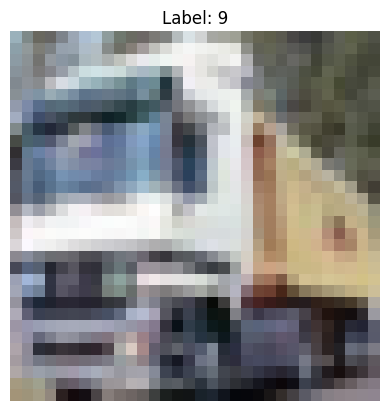

In [3]:
import pickle
import numpy as np
import os

# Clone the GitHub repository
!git clone https://github.com/NeerajMansingh/PRML-PROJECT.git

# ********BLACK BOX************************************************************************************

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Path to the CIFAR-10 batches folder
path = "/content/PRML-PROJECT/Downloads/cifar_extracted/cifar-10-batches-py"   # **CHANGE FILE NAME**

# Load all batch files and combine data
data_train = []      # **FLATTENED RGB FOR EACH PHOTO STORED HERE**
labels_train = []    # **THEIR CORRESPONDING LABELS**

for i in range(1, 6):  # There are 5 batch files: data_batch_1 to data_batch_5
    batch_file = os.path.join(path, f"data_batch_{i}")
    batch = unpickle(batch_file)
    data_train.append(batch[b'data'])
    labels_train.extend(batch[b'labels'])

# Convert to numpy arrays
data_train = np.concatenate(data_train)    # **FLATTENED RGB FOR EACH PHOTO STORED HERE** [50000 x 3072]  , (32*32*3 = 3072)
labels_train = np.array(labels_train)      # **THEIR CORRESPONDING LABELS** [    say for flattened array [32,5,0,2,1,..... 213,40] (=> ie, 3072 elements) the label is 5    ]

# ********BLACK BOX************************************************************************************

print(data_train[1])    # 2nd picture
print(labels_train[1])  # 2nd picture label

# ********BLACK BOX TO SHOW PICTURE. REMOVE THIS AS THIS IS ONLY FOR EXAMPLE.************************************************************************************
import matplotlib.pyplot as plt

# Reshape the 2nd image (index 1) from flattened (3072,) to (32, 32, 3)
image = data_train[1].reshape(3, 32, 32).transpose(1, 2, 0)  # Transpose to (32, 32, 3)
label = labels_train[1]  # 2nd image's label

plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide the axis for better view
plt.show()
# ********BLACK BOX************************************************************************************
